In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mammals = pd.read_csv('data/mammals.txt', sep='\t', names=['brain', 'body'], header=0)
mammals.head()

,brain,body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [3]:
# Just for today, let's drop some of the larger values.
# Of course irl you don't just randomly do this. This is
# only for example.
mammals = mammals[mammals.body < 200]
mammals.shape

(51, 2)

### At a glance: How are our LINE assumptions here?

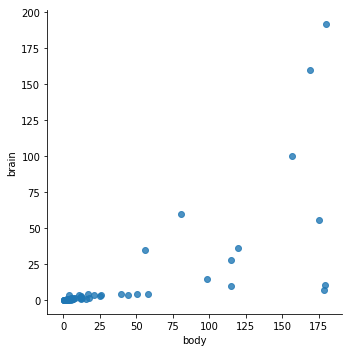

In [4]:
# ci=False      --> Don't show confidence band
# fit_reg=False --> Don't show regression line
sns.lmplot(x='body', y='brain', data=mammals, ci=False, fit_reg=False);

### Let's Avenger's Infinity War our dataset

In [5]:
# Randomly assign every observation to either universe 1 or universe 2.
np.random.seed(12345)
mammals['universe'] = np.random.randint(1, 3, len(mammals))
mammals.head()

,brain,body,universe
0,3.385,44.5,1
1,0.480,15.5,2
2,1.350,8.1,2
4,36.330,119.5,2
5,27.660,115.0,1


### How are Bias and Variance here?

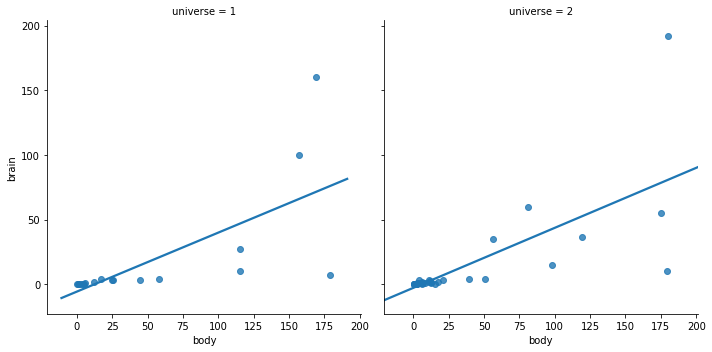

In [10]:
# Also try hue='universe'
sns.lmplot(x='body', y='brain', data=mammals, col='universe', ci=False);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


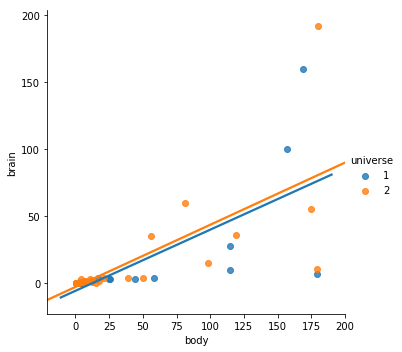

In [6]:
sns.lmplot(x='body', y='brain', data=mammals, hue='universe', ci=False);

### Let's DO IT LIVE!
Let's play with the `order=k` parameter and find a good bias-var tradeoff. Maybe let's make a function using `**kwargs` to speed this up?

In [11]:
import warnings
warnings.filterwarnings("ignore")

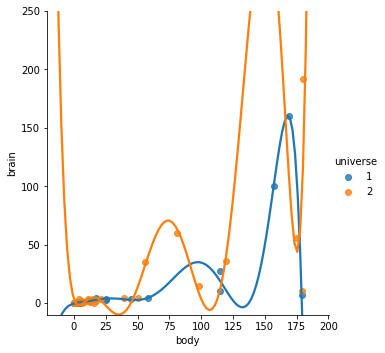

In [13]:
sns.lmplot(x="body", y="brain", data=mammals, hue="universe", ci=False, order=8)
plt.ylim(-10, 250);

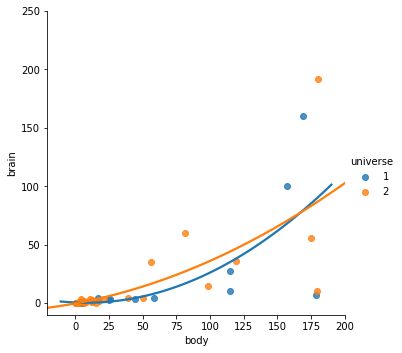

In [16]:
sns.lmplot(x="body", y="brain", data=mammals, hue="universe", ci=False, order=2)
plt.ylim(-10, 250);

In [17]:
mammals["log_body"] = np.log(mammals["body"])
mammals["log_brain"] = np.log(mammals["brain"])

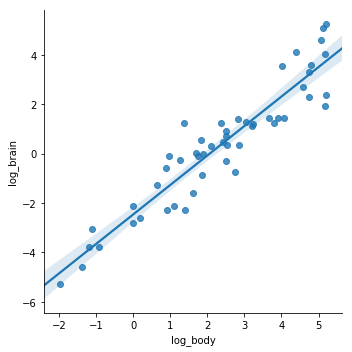

In [18]:
sns.lmplot(x="log_body", y="log_brain", data=mammals)